# TD `pandas`

## Préparation de l'environnement

### Installation de Python

Sur windows, téléchargez et installez Python depuis le site officiel : https://www.python.org/downloads/

### Installation de pip

pip est un gestionnaire de paquets utilisé pour installer et gérer des paquets de logiciels écrits en Python. Il est installé par défaut avec Python 2 >=2.7.9 ou Python 3 >=3.4.

### Installation de Docker

Docker est un logiciel libre qui permet de créer, déployer et exécuter des applications dans des conteneurs logiciels. Il est disponible pour Windows, macOS et Linux.

Pour installer Docker, téléchargez et installez Docker Desktop depuis le site officiel : https://www.docker.com/products/docker-desktop

### Installation de MariaDB

MariaDB est un système de gestion de base de données relationnelle (SGBDR) libre et open source. Il est disponible pour Windows, macOS et Linux.

Démarrer le conteneur MariaDB en exécutant la commande suivante :

```bash
docker-compose up -d
```

### Création d'un environnement virtuel

Un environnement virtuel est un outil qui aide à garder les dépendances requises pour un  projet de façon séparé des autres. Il s'agit d'un dossier contenant des copies spécifiques des bibliothèques Python nécessaires pour les projets Python.

Pour créer un environnement virtuel, exécutez la commande suivante :

```bash
py -m venv .venv
```

Pour activer l'environnement virtuel :
```bash
# sous Windows:
./.venv/Scripts/activate

# sous Linux:
source ./.venv/bin/activate
```

Pour faire en sorte que l'environnement virtuel Python s'active automatiquement pour ce projet :

1. Ouvrez le fichier `.vscode/settings.json`
2. Ajoutez-y les deux lignes suivantes et sauvegardez :
    ```
    # sous Windows:
    {
        "python.defaultInterpreterPath": "./.venv/Scripts/python.exe",
        "python.terminal.activateEnvironment": true,
    }

    # sous Linux:
    {
        "python.defaultInterpreterPath": "./.venv/bin/python",
        "python.terminal.activateEnvironment": true
    }
    ```

## Exercice 1 : sauvegarder des données CSV dans une base de données avec les bibliothèques `pandas`, `pymysql` et `sqlalchemy`

- Installation des dépendances
- Lire le fichier CSV
- Créer une connexion à la base de données
- Créer un curseur
- Insérer les données dans la base de données

### Étape 1 : Installation des dépendances

Assurez-vous d'avoir installé les modules requis : pandas et pymysql. Vous pouvez les installer en utilisant pip:

```bash
pip install pandas pymysql
```

### Étape 2 : Créez un fichier CSV

Créez un fichier CSV nommé "clients.csv" avec le contenu suivant :

```csv
id,firstname,lastname,email,profession,country,city
1,Juliane,Ramona,Juliane.Ramona@yopmail.com,worker,Mexico,Chennai
2,Jsandye,Marlie,Jsandye.Marlie@yopmail.com,doctor,Malta,Lahore
3,Calla,Christal,Calla.Christal@yopmail.com,doctor,Tokelau,Douglas
```

### Étape 3 : Créez un fichier Python

Créez un fichier Python nommé "import_csv.py". Ce fichier contiendra le code pour lire le fichier CSV et l'importer dans la base de données.


#### Étape 3.1 : Importer les modules

Importez les modules pandas et pymysql dans le fichier Python.

In [ ]:
import pandas as pd
import pymysql

#### Étape 3.2 : Lire le fichier CSV

1. Lisez le fichier CSV "clients.csv" et affichez le contenu.
2. Affichez de la ligne 2 à la ligne 4 du fichier CSV.

In [ ]:
df = pd.read_csv('clients.csv', index_col='id', header=0)
df[0:4]

,firstname,lastname,email,profession,country,city
id,,,,,,
1,Clary,Gilmour,Clary.Gilmour@yopmail.com,doctor,"Micronesia, Federated States of",Kobe
2,Sean,Saunderson,Sean.Saunderson@yopmail.com,developer,Ethiopia,Rotterdam
3,Leontine,Wenoa,Leontine.Wenoa@yopmail.com,worker,Comoros,Roseau
4,Anthia,Dash,Anthia.Dash@yopmail.com,developer,Slovenia,Batticaloa


3. Placer le code dans une fonction nommée "lire_csv" et appeler cette fonction dans le fichier Python. Cette fonction aura comme signature : `lire_csv(nom_fichier: str) -> pd.DataFrame`

In [ ]:
def lire_csv(nom_fichier: str, *args, **kwargs) -> pd.DataFrame:
    return pd.read_csv('clients.csv', *args, **kwargs)

df = lire_csv(nom_fichier='clients.csv', index_col='id', header=0)
df

,firstname,lastname,email,profession,country,city
id,,,,,,
1,Clary,Gilmour,Clary.Gilmour@yopmail.com,doctor,"Micronesia, Federated States of",Kobe
2,Sean,Saunderson,Sean.Saunderson@yopmail.com,developer,Ethiopia,Rotterdam
3,Leontine,Wenoa,Leontine.Wenoa@yopmail.com,worker,Comoros,Roseau
4,Anthia,Dash,Anthia.Dash@yopmail.com,developer,Slovenia,Batticaloa
5,Barbara,Ulphia,Barbara.Ulphia@yopmail.com,worker,British Indian Ocean Territory,Perth
...,...,...,...,...,...,...
996,Ezmeralda,Connelly,Ezmeralda.Connelly@yopmail.com,firefighter,Northern Mariana Islands,Odessa
997,Annabela,Lanita,Annabela.Lanita@yopmail.com,doctor,Slovakia,Valletta
998,Glynnis,Cherianne,Glynnis.Cherianne@yopmail.com,firefighter,Czech Republic,Kaohsiung


#### Étape 3.3 : Importer des données dans la base de données

##### Étape 3.3.1 : Créer une connexion à la base de données

Créez une fonction nommée "creer_connexion" qui aura comme signature : `se_connecter_db() -> pymysql.Connection`. Cette fonction aura pour but de créer une connexion à la base de données.

Testez la fonction en appelant la fonction "se_connecter_db" dans le fichier Python.

In [ ]:
def se_connecter_db(host, user, password, database):
    conn = pymysql.connect(host=host, user=user, password=password, database=database)
    return conn

##### Étape 3.3.2 : Insérer les données dans la base de données

Fabriquez une liste d'utilisateurs à partir du fichier CSV.

Insérez des données utilisateurs dans la base de données.

In [ ]:
dataset_filename = 'clients.csv'
db_host = "localhost"
db_username = "user"
db_password = "user"
db_database = "exercice"
req_sql = """
INSERT INTO clients (
    id, prenom, nom, email, profession, pays, ville
) VALUES (%s, %s, %s, %s, %s, %s, %s)
"""

In [ ]:
import pandas as pd
import pymysql
import time

df = pd.read_csv(dataset_filename, index_col='id', header=0)
start_time = time.time()
with pymysql.connect(host=db_host,
                    user=db_username,
                    password=db_password,
                    database=db_database) as conn:
    cursor = conn.cursor()
    for index, row in df.iterrows():
        data_row = (row[col_name] for col_name in df.columns.tolist())
        cursor.execute(req_sql, (index, *data_row))
    conn.commit()
print("Temps écoulé :", time.time() - start_time, "secondes")

Temps écoulé : 0.8515191078186035 secondes


À titre de comparaison, une autre manière d'insérer des données CSV dans une base de données consiste à utiliser la bibliothèque Python `sqlalchemy`:

In [ ]:
import pandas as pd
import sqlalchemy
import time

df = pd.read_csv(dataset_filename, index_col='id', header=0)
engine = sqlalchemy.create_engine(
    f'mysql+pymysql://{db_username}:{db_password}@{db_host}/{db_database}'
)
map_df_to_db_col_names = {
    'firstname': 'prenom',
    'lastname': 'nom',
    'email': 'email',
    'profession': 'profession',
    'country': 'pays',
    'city': 'ville'
}
start_time = time.time()
df.rename(columns=map_df_to_db_col_names).to_sql(name=table_name, 
                                                con=engine,
                                                if_exists='replace',
                                                index_label='id')
print("Temps écoulé :", time.time() - start_time, "secondes")

Temps écoulé : 0.31548357009887695 secondes


La seconde méthode est manifestement plus rapide que la première.

## Exercice 2 : transformer des données grâce à la bibliothèque `pandas`

Exemple d'utilisation de pandas est basés sur un fichier CSV avec les colonnes suivantes : 

    id,firstname,lastname,email,profession,country,city,birthdate,salary

### Étape  1 : Charger le fichier CSV

In [10]:
import pandas as pd

file_path = 'clients_with_dob_and_salary.csv'
df = pd.read_csv(file_path, index_col='id')
df.head()

,firstname,lastname,email,profession,country,city,birthdate,salary
id,,,,,,,,
100,Agathe,Raama,Agathe.Raama@yopmail.com,firefighter,Sierra Leone,Athens,06-26-1959,3198.82
101,Cristabel,Fiann,Cristabel.Fiann@yopmail.com,developer,Holy See (Vatican City State),Quito,11-24-1980,4384.24
102,Chrystel,Melleta,Chrystel.Melleta@yopmail.com,worker,Sao Tome and Principe,Bratislava,12-02-1985,2001.25
103,Jasmina,Tound,Jasmina.Tound@yopmail.com,worker,Cook Islands,Virginia Beach,07-04-1972,1956.66
104,Therine,Korey,Therine.Korey@yopmail.com,police officer,Saint Pierre and Miquelon,Aarhus,10-04-1970,6902.69


### Étape 2 : Afficher les informations générales du DataFrame

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 100 to 10099
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   firstname   10000 non-null  object 
 1   lastname    10000 non-null  object 
 2   email       10000 non-null  object 
 3   profession  10000 non-null  object 
 4   country     10000 non-null  object 
 5   city        10000 non-null  object 
 6   birthdate   10000 non-null  object 
 7   salary      10000 non-null  float64
dtypes: float64(1), object(7)
memory usage: 703.1+ KB


### Étape 3 : Afficher le nombre de personnes par profession

In [12]:
professions = df['profession'].value_counts()
print(professions)

profession
police officer    2057
firefighter       2026
doctor            1987
developer         1967
worker            1963
Name: count, dtype: int64


### Étape 4 : Afficher le nombre de personnes par pays

In [13]:
countries = df['country'].value_counts()
print(countries)

country
Guatemala                                 57
Korea, Democratic People"S Republic of    55
Mongolia                                  54
Bouvet Island                             54
Mayotte                                   53
                                          ..
Burkina Faso                              29
Finland                                   29
Virgin Islands, British                   28
Uganda                                    28
Bulgaria                                  27
Name: count, Length: 243, dtype: int64


Normaliser les noms, prénoms, noms des pays et des villes (par exemple `Â` -> `A`) :

In [14]:
from unidecode import unidecode

col_names = ['firstname', 'lastname', 'profession', 'country', 'city']
for col_name in col_names:
    df[col_name] = df[col_name].apply(lambda x: unidecode(x))

df

,firstname,lastname,email,profession,country,city,birthdate,salary
id,,,,,,,,
100,Agathe,Raama,Agathe.Raama@yopmail.com,firefighter,Sierra Leone,Athens,06-26-1959,3198.82
101,Cristabel,Fiann,Cristabel.Fiann@yopmail.com,developer,Holy See (Vatican City State),Quito,11-24-1980,4384.24
102,Chrystel,Melleta,Chrystel.Melleta@yopmail.com,worker,Sao Tome and Principe,Bratislava,12-02-1985,2001.25
103,Jasmina,Tound,Jasmina.Tound@yopmail.com,worker,Cook Islands,Virginia Beach,07-04-1972,1956.66
104,Therine,Korey,Therine.Korey@yopmail.com,police officer,Saint Pierre and Miquelon,Aarhus,10-04-1970,6902.69
...,...,...,...,...,...,...,...,...
10095,Ileana,Alva,Ileana.Alva@yopmail.com,firefighter,Uganda,Salt Lake City,05-04-1973,3205.38
10096,Ann-Marie,Niccolo,Ann-Marie.Niccolo@yopmail.com,police officer,Israel,Pittsburgh,07-27-1967,4032.31
10097,Trixi,Dominy,Trixi.Dominy@yopmail.com,police officer,Sao Tome and Principe,Barcelona,07-22-1974,5177.43


Identifier puis nettoyer tout caractère non souhaité dans les noms, prénoms, pays et villes :

In [15]:
import re
from pprint import pprint

re_pattern_carac_non_souhaités = r'''[^\w '.,)(-]'''
col_names = ['firstname', 'lastname', 'profession', 'country', 'city']
variantes_incorrectes = {}
for col_name in col_names:
    variantes_incorrectes[col_name] = df[df[col_name].str.contains(pat=re_pattern_carac_non_souhaités)][col_name].unique().tolist()
pprint(variantes_incorrectes)


{'city': ['Nuku`alofa'],
 'country': ['Lao People"S Democratic Republic',
             'Cote D"Ivoire',
             'Korea, Democratic People"S Republic of'],
 'firstname': [],
 'lastname': [],
 'profession': []}


In [16]:
col_name = 'country'
noms_pays_incorrects = ['Lao People"S Democratic Republic', 'Cote D"Ivoire', 'Korea, Democratic People"S Republic of']
noms_pays_corrects = ["Lao People's Democratic Republic", "Cote D'Ivoire", "Korea, Democratic People's Republic of"]
for incorrect, correct in zip(noms_pays_incorrects, noms_pays_corrects):
    df.loc[df[col_name] == incorrect, col_name] = correct
    print(f"{incorrect!r}   remplacé par   {correct!r}")

'Lao People"S Democratic Republic'   remplacé par   "Lao People's Democratic Republic"
'Cote D"Ivoire'   remplacé par   "Cote D'Ivoire"
'Korea, Democratic People"S Republic of'   remplacé par   "Korea, Democratic People's Republic of"


In [17]:
col_name = 'city'
noms_ville_incorrects = ['Nuku`alofa']
noms_ville_corrects = ["Nuku'alofa"]
for incorrect, correct in zip(noms_ville_incorrects, noms_ville_corrects):
    df.loc[df[col_name] == incorrect, col_name] = correct
    print(f"{incorrect!r}   remplacé par   {correct!r}")

'Nuku`alofa'   remplacé par   "Nuku'alofa"


### Étape 5 : Afficher les 10 premières personnes dont le nom de famille commence par la lettre 'D'

In [18]:
df[df['lastname'].str.startswith('D')].head(10)

,firstname,lastname,email,profession,country,city,birthdate,salary
id,,,,,,,,
109,Cristabel,Dulciana,Cristabel.Dulciana@yopmail.com,developer,Russian Federation,Wollongong,03-06-1999,4439.57
142,Alia,Dash,Alia.Dash@yopmail.com,worker,Madagascar,Invercargill,04-22-1990,6857.65
165,Ofilia,Decato,Ofilia.Decato@yopmail.com,firefighter,Malaysia,Greenwich,07-29-1952,6666.81
167,Oona,Damarra,Oona.Damarra@yopmail.com,worker,Svalbard and Jan Mayen,Ludhiana,08-02-1995,4817.13
245,Angelique,Docilla,Angelique.Docilla@yopmail.com,developer,Thailand,Cartagena,01-31-1974,5516.06
251,Jorry,Dichy,Jorry.Dichy@yopmail.com,developer,Serbia and Montenegro,Ponta Delgada,07-05-1951,1501.70
253,Roberta,Daniele,Roberta.Daniele@yopmail.com,firefighter,Svalbard and Jan Mayen,Barcelona,09-14-1989,4908.01
303,Chandra,Destinee,Chandra.Destinee@yopmail.com,police officer,Gabon,Damascus,08-07-1993,1643.86
320,Andeee,Dorine,Andeee.Dorine@yopmail.com,police officer,Guyana,Greenwich,09-06-1981,3014.04


### Étape 6 : Créer un nouveau DataFrame contenant uniquement les colonnes firstname, lastname et email

In [19]:
contact_info = df[['firstname','lastname','email']]
contact_info.head()

,firstname,lastname,email
id,,,
100,Agathe,Raama,Agathe.Raama@yopmail.com
101,Cristabel,Fiann,Cristabel.Fiann@yopmail.com
102,Chrystel,Melleta,Chrystel.Melleta@yopmail.com
103,Jasmina,Tound,Jasmina.Tound@yopmail.com
104,Therine,Korey,Therine.Korey@yopmail.com


### Étape 7 : Trier le DataFrame par ordre alphabétique croissant des noms de famille

In [20]:
sorted_data = df.sort_values(by=['lastname'])
sorted_data.head()

,firstname,lastname,email,profession,country,city,birthdate,salary
id,,,,,,,,
1509,Gwenneth,Aaberg,Gwenneth.Aaberg@yopmail.com,doctor,Lao People's Democratic Republic,Abu Dhabi,08-19-1960,1583.48
4519,Marjie,Aaberg,Marjie.Aaberg@yopmail.com,developer,New Caledonia,Bandung,06-16-1993,2592.59
4100,Trudie,Aaberg,Trudie.Aaberg@yopmail.com,police officer,Guatemala,Djibouti (city),11-03-1996,6932.66
5788,Christian,Aaberg,Christian.Aaberg@yopmail.com,police officer,Timor-Leste,Bamako,03-15-1968,6230.50
4878,Therine,Aaberg,Therine.Aaberg@yopmail.com,worker,Russian Federation,Kigali,08-21-1996,2981.36


### Étape 8 : Sauvegarder les données triées dans un nouveau fichier CSV

In [21]:
sorted_data.to_csv('sorted_data.csv', index=True)

### Étape 9 : Trouver la ville la plus fréquente dans le fichier

In [22]:
most_common_city = df['city'].mode()
print(most_common_city)

0    Mogadishu
Name: city, dtype: object


In [23]:
print("La ville la plus fréquente est :" , most_common_city.iloc[0])

La ville la plus fréquente est : Mogadishu


### Étape 10 : Filtrer les personnes travaillant dans une profession spécifique

In [24]:
df['profession'].value_counts()

profession
police officer    2057
firefighter       2026
doctor            1987
developer         1967
worker            1963
Name: count, dtype: int64

In [25]:
df[df['profession'] == 'police officer']

,firstname,lastname,email,profession,country,city,birthdate,salary
id,,,,,,,,
104,Therine,Korey,Therine.Korey@yopmail.com,police officer,Saint Pierre and Miquelon,Aarhus,10-04-1970,6902.69
111,Kittie,Stefa,Kittie.Stefa@yopmail.com,police officer,United States Minor Outlying Islands,Geelong,09-20-1967,4406.86
112,Lelah,Claudine,Lelah.Claudine@yopmail.com,police officer,Portugal,Kunming,02-11-1991,4960.87
116,Adriana,Kat,Adriana.Kat@yopmail.com,police officer,Algeria,Gangtok,09-13-1954,2677.26
119,Jerry,Uird,Jerry.Uird@yopmail.com,police officer,New Zealand,Handan,05-29-1978,1991.23
...,...,...,...,...,...,...,...,...
10079,Raf,Madelene,Raf.Madelene@yopmail.com,police officer,Cook Islands,Wollongong,07-02-1997,5347.90
10082,Daryl,Ezar,Daryl.Ezar@yopmail.com,police officer,"Palestinian Territory, Occupied",Alofi,12-07-1988,3895.78
10089,Cyb,Borrell,Cyb.Borrell@yopmail.com,police officer,South Georgia and the South Sandwich Islands,Mogadishu,06-17-1988,5169.65


### Étape 11 : Calculer l'age moyen par profession

In [26]:
df['birthdate'] = pd.to_datetime(df['birthdate'], format="%m-%d-%Y")
df.head()

,firstname,lastname,email,profession,country,city,birthdate,salary
id,,,,,,,,
100,Agathe,Raama,Agathe.Raama@yopmail.com,firefighter,Sierra Leone,Athens,1959-06-26,3198.82
101,Cristabel,Fiann,Cristabel.Fiann@yopmail.com,developer,Holy See (Vatican City State),Quito,1980-11-24,4384.24
102,Chrystel,Melleta,Chrystel.Melleta@yopmail.com,worker,Sao Tome and Principe,Bratislava,1985-12-02,2001.25
103,Jasmina,Tound,Jasmina.Tound@yopmail.com,worker,Cook Islands,Virginia Beach,1972-07-04,1956.66
104,Therine,Korey,Therine.Korey@yopmail.com,police officer,Saint Pierre and Miquelon,Aarhus,1970-10-04,6902.69


In [27]:
import datetime

def calcule_age(birthdate):
    today = datetime.datetime.now()
    age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
    return age

df['age'] = df['birthdate'].apply(calcule_age)
df.head()

,firstname,lastname,email,profession,country,city,birthdate,salary,age
id,,,,,,,,,
100,Agathe,Raama,Agathe.Raama@yopmail.com,firefighter,Sierra Leone,Athens,1959-06-26,3198.82,63
101,Cristabel,Fiann,Cristabel.Fiann@yopmail.com,developer,Holy See (Vatican City State),Quito,1980-11-24,4384.24,42
102,Chrystel,Melleta,Chrystel.Melleta@yopmail.com,worker,Sao Tome and Principe,Bratislava,1985-12-02,2001.25,37
103,Jasmina,Tound,Jasmina.Tound@yopmail.com,worker,Cook Islands,Virginia Beach,1972-07-04,1956.66,50
104,Therine,Korey,Therine.Korey@yopmail.com,police officer,Saint Pierre and Miquelon,Aarhus,1970-10-04,6902.69,52


In [28]:
age_par_profession = df.groupby('profession')['age'].mean()
age_par_profession

profession
developer         46.523640
doctor            46.688475
firefighter       46.448174
police officer    46.662615
worker            46.793174
Name: age, dtype: float64

### Étape 12 : Calculer le salaire moyen par profession

In [29]:
average_salary_by_profession = df.groupby('profession')['salary'].mean()
average_salary_by_profession

profession
developer         4276.123259
doctor            4229.282159
firefighter       4268.213968
police officer    4295.620243
worker            4201.897071
Name: salary, dtype: float64

### Étape 13 : Afficher les personnes ayant un salaire supérieur à un montant donné, par exemple 5000

In [30]:
high_salary = df[df['salary'] > 5000]
high_salary

,firstname,lastname,email,profession,country,city,birthdate,salary,age
id,,,,,,,,,
104,Therine,Korey,Therine.Korey@yopmail.com,police officer,Saint Pierre and Miquelon,Aarhus,1970-10-04,6902.69,52
107,Alisha,Tamsky,Alisha.Tamsky@yopmail.com,developer,Ireland,Alofi,1984-10-25,6367.38,38
117,Lucy,Orlene,Lucy.Orlene@yopmail.com,developer,Papua New Guinea,Port Said,1975-10-06,5834.48,47
120,Marcelline,Ricarda,Marcelline.Ricarda@yopmail.com,police officer,"Iran, Islamic Republic Of",Belmopan,1982-02-06,5453.94,41
123,Allyce,Catie,Allyce.Catie@yopmail.com,worker,Latvia,Rome,1981-01-08,5428.52,42
...,...,...,...,...,...,...,...,...,...
10088,Flory,Mendez,Flory.Mendez@yopmail.com,developer,Panama,San Fernando,1958-11-28,6102.22,64
10089,Cyb,Borrell,Cyb.Borrell@yopmail.com,police officer,South Georgia and the South Sandwich Islands,Mogadishu,1988-06-17,5169.65,34
10090,Sarette,Glovsky,Sarette.Glovsky@yopmail.com,firefighter,Pitcairn,San Jose,1967-03-23,5510.82,56


### Étape 14 : Afficher le pourcentage de personnes par pays

In [31]:
percentage_by_country = df['country'].value_counts(normalize=True) * 100
percentage_by_country.sort_values(ascending=False)

country
Guatemala                                 0.57
Korea, Democratic People's Republic of    0.55
Mongolia                                  0.54
Bouvet Island                             0.54
Mayotte                                   0.53
                                          ... 
Burkina Faso                              0.29
Finland                                   0.29
Virgin Islands, British                   0.28
Uganda                                    0.28
Bulgaria                                  0.27
Name: proportion, Length: 243, dtype: float64

### Étape 15 : Trouver le salaire le plus élevé et le plus bas par pays

In [32]:
df.groupby('country')['salary'].max()

country
Afghanistan          6934.32
Aland Islands        6315.04
Albania              6896.58
Algeria              6851.21
American Samoa       6952.84
                      ...   
Wallis and Futuna    6839.43
Western Sahara       6972.09
Yemen                6751.17
Zambia               6485.58
Zimbabwe             6854.94
Name: salary, Length: 243, dtype: float64

In [33]:
df.groupby('country').agg({'salary': 'max'})

,salary
country,
Afghanistan,6934.32
Aland Islands,6315.04
Albania,6896.58
Algeria,6851.21
American Samoa,6952.84
...,...
Wallis and Futuna,6839.43
Western Sahara,6972.09
Yemen,6751.17


In [34]:
df.groupby('country')['salary'].min()

country
Afghanistan          1530.00
Aland Islands        1958.59
Albania              1666.72
Algeria              1532.05
American Samoa       1572.81
                      ...   
Wallis and Futuna    1666.02
Western Sahara       1722.41
Yemen                1808.89
Zambia               2042.42
Zimbabwe             1656.42
Name: salary, Length: 243, dtype: float64

In [35]:
df.groupby('country').agg({'salary': 'min'})

,salary
country,
Afghanistan,1530.00
Aland Islands,1958.59
Albania,1666.72
Algeria,1532.05
American Samoa,1572.81
...,...
Wallis and Futuna,1666.02
Western Sahara,1722.41
Yemen,1808.89


### Étape 16 : Créer un nouveau DataFrame en ne gardant que les personnes ayant un certain âge,par exemple 30 ans

In [36]:
df[df['age'] == 30]

,firstname,lastname,email,profession,country,city,birthdate,salary,age
id,,,,,,,,,
187,Yvonne,Remmer,Yvonne.Remmer@yopmail.com,police officer,"Macedonia, The Former Yugoslav Republic of",Agartala,1993-04-08,4124.12,30
203,Violet,Bluh,Violet.Bluh@yopmail.com,doctor,Central African Republic,Podgorica,1992-11-01,6052.46,30
229,Ezmeralda,Natica,Ezmeralda.Natica@yopmail.com,firefighter,Tajikistan,Macau,1993-02-09,6568.19,30
257,Collen,Sothena,Collen.Sothena@yopmail.com,doctor,Malaysia,Ashgabat,1992-11-23,3600.91,30
277,Mahalia,Lytton,Mahalia.Lytton@yopmail.com,firefighter,Mayotte,George Town,1993-02-19,5243.68,30
...,...,...,...,...,...,...,...,...,...
9800,Dagmar,Moseley,Dagmar.Moseley@yopmail.com,firefighter,Netherlands,Nairobi,1992-04-20,2708.98,30
9851,Lanna,Bouchard,Lanna.Bouchard@yopmail.com,police officer,Australia,Tripoli,1992-09-22,2431.41,30
9935,Antonietta,Ajay,Antonietta.Ajay@yopmail.com,firefighter,Marshall Islands,Kaesong,1992-12-31,6393.50,30


### Étape  17 : Afficher le nombre de personnes par tranche d'âge (par exemple, tous les 10 ans) enutilisant la fonction utilisée dans l'exercice 16

In [37]:
step = 10
age_bins = list(range(0, 100 + step, step))
age_bins

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [38]:
age_labels = [f'{i - step}-{i - 1}' for i in range(0 + step, 100 + step, step)]
print(age_labels)

['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']


In [39]:
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, include_lowest=True)
df

,firstname,lastname,email,profession,country,city,birthdate,salary,age,age_group
id,,,,,,,,,,
100,Agathe,Raama,Agathe.Raama@yopmail.com,firefighter,Sierra Leone,Athens,1959-06-26,3198.82,63,60-69
101,Cristabel,Fiann,Cristabel.Fiann@yopmail.com,developer,Holy See (Vatican City State),Quito,1980-11-24,4384.24,42,40-49
102,Chrystel,Melleta,Chrystel.Melleta@yopmail.com,worker,Sao Tome and Principe,Bratislava,1985-12-02,2001.25,37,30-39
103,Jasmina,Tound,Jasmina.Tound@yopmail.com,worker,Cook Islands,Virginia Beach,1972-07-04,1956.66,50,40-49
104,Therine,Korey,Therine.Korey@yopmail.com,police officer,Saint Pierre and Miquelon,Aarhus,1970-10-04,6902.69,52,50-59
...,...,...,...,...,...,...,...,...,...,...
10095,Ileana,Alva,Ileana.Alva@yopmail.com,firefighter,Uganda,Salt Lake City,1973-05-04,3205.38,49,40-49
10096,Ann-Marie,Niccolo,Ann-Marie.Niccolo@yopmail.com,police officer,Israel,Pittsburgh,1967-07-27,4032.31,55,50-59
10097,Trixi,Dominy,Trixi.Dominy@yopmail.com,police officer,Sao Tome and Principe,Barcelona,1974-07-22,5177.43,48,40-49


In [40]:
df['age_group'].value_counts()

age_group
40-49    1948
50-59    1944
30-39    1924
60-69    1916
20-29    1887
70-79     381
0-9         0
10-19       0
80-89       0
90-99       0
Name: count, dtype: int64

### Étape 18 : Afficher la répartition des salaires en utilisant des histogrammes

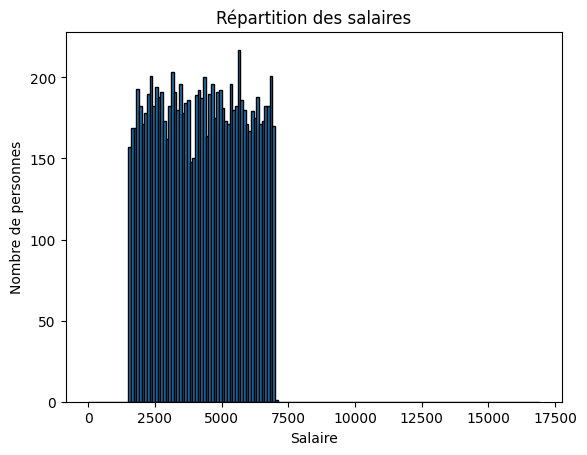

In [41]:
import matplotlib.pyplot as plt

how_many_bins = 100
step = len(df) // how_many_bins
salary_bins = list(range(0, int(df['salary'].max()) + len(df), step))
plt.hist(df['salary'], bins=salary_bins, edgecolor='black')
plt.title('Répartition des salaires') 
plt.xlabel('Salaire')
plt.ylabel('Nombre de personnes')
plt.show()

### Étape 19 : Trouver les personnes avec le même nom de famille

In [42]:
col_name = 'lastname'
df[df[col_name].duplicated(keep=False)].sort_values(by=col_name).set_index(keys=[col_name, df.index], drop=False)

firstname lastname                         email   
lastname id                                                        
Aaberg   100     Gwenneth   Aaberg   Gwenneth.Aaberg@yopmail.com  \
         101       Marjie   Aaberg     Marjie.Aaberg@yopmail.com   
         102       Trudie   Aaberg     Trudie.Aaberg@yopmail.com   
         103    Christian   Aaberg  Christian.Aaberg@yopmail.com   
         104      Therine   Aaberg    Therine.Aaberg@yopmail.com   
...                   ...      ...                           ...   
Zuzana   10095     Shauna   Zuzana     Shauna.Zuzana@yopmail.com   
         10096   Carolina   Zuzana   Carolina.Zuzana@yopmail.com   
         10097     Mignon   Zuzana     Mignon.Zuzana@yopmail.com   
         10098    Ellette   Zuzana    Ellette.Zuzana@yopmail.com   
         10099     Livvyy   Zuzana     Livvyy.Zuzana@yopmail.com   

                    profession                           country   
lastname id                                                        
Aaberg   100            doctor  Lao People's Democratic Republic  \
         101         developer                     New Caledonia   
         102    police officer                         Guatemala   
         103    police officer                       Timor-Leste   
         104            worker                Russian Federation   
...                        ...                               ...   
Zuzana   10095     firefighter                           Liberia   
         10096       developer                           Bolivia   
         10097          worker                         Nicaragua   
         10098     firefighter                          Paraguay   
         10099          doctor                         Australia   

                           city  birthdate   salary  age age_group  
lastname id                                                         
Aaberg   100          Abu Dhabi 1960-08-19  1583.48   62     60-69  
         101            Bandung 1993-06-16  2592.59   29     20-29  
         102    Djibouti (city) 1996-11-03  6932.66   26     20-29  
         103             Bamako 1968-03-15  6230.50   55     50-59  
         104             Kigali 1996-08-21  2981.36   26     20-29  
...                         ...        ...      ...  ...       ...  
Zuzana   10095          Seville 1969-01-05  3883.31   54     50-59  
         10096          Houston 1988-06-05  3998.19   34     30-39  
         10097      Minneapolis 1964-12-01  4954.83   58     50-59  
         10098      Surat Thani 1967-08-09  4268.53   55     50-59  
         10099    Port of Spain 1978-05-25  6286.06   44     40-49  

[10000 rows x 10 columns]

### Étape 20 : Afficher la répartition des professions par pays

In [43]:
profession_par_pays = df.groupby(['country', 'profession']).size().unstack().convert_dtypes(convert_integer=True)
profession_par_pays

profession,developer,doctor,firefighter,police officer,worker
country,,,,,
Afghanistan,4,9,10,7,9
Aland Islands,7,10,5,6,6
Albania,6,7,4,10,14
Algeria,13,6,8,13,8
American Samoa,14,10,5,8,4
...,...,...,...,...,...
Wallis and Futuna,7,6,10,4,3
Western Sahara,7,10,8,11,14
Yemen,7,10,5,12,6
